<a href="https://colab.research.google.com/github/yal521/DSCI441-machine-learning-project/blob/main/DSCI_441_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
from numpy import where
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from collections import Counter
import sklearn.metrics as metrique
from numpy import loadtxt
from keras.models import load_model
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.backend import cast
from keras.utils import np_utils
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from google.colab import drive
import os

Load and read the data set

In [2]:
# Load the data and read the first few lines of data
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Yang_DSCI441_Final_Project')
Credit_data = pd.read_csv("sampled_Credit_data-2.csv")
Credit_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136495.0,1.891340,-0.941703,-0.465693,0.822444,-1.053182,-0.418160,-0.599302,-0.038268,0.063975,...,-0.713578,-1.674146,0.424086,-0.271521,-0.533762,-1.065501,0.049795,-0.011126,100.11,0
1,38571.0,-0.429903,0.167311,0.647957,-1.936330,0.660004,-0.624739,0.575645,0.100204,0.642102,...,0.125645,0.444372,-0.290911,-0.292411,0.440147,-0.694727,0.039023,-0.010394,1.00,0
2,26672.0,-1.204670,0.074550,1.778099,1.433339,0.167659,0.349178,0.858258,0.177383,-0.940010,...,0.165821,0.247312,0.166215,0.231063,0.497426,-0.168165,0.030430,0.087186,177.00,0
3,156508.0,-11.521712,9.654525,-9.368721,-0.983806,-6.521962,-2.304209,-6.099734,8.252839,0.976392,...,0.536635,0.732827,1.127417,-0.059780,0.766781,-0.088046,0.561914,0.504720,19.99,0
4,79672.0,-1.406149,-0.054912,2.723919,-0.979521,0.449242,0.560431,-0.245460,0.676369,0.245946,...,0.086798,0.154142,-0.159691,-0.285275,0.213553,0.118448,0.011163,0.048650,4.99,0


In [3]:
Credit_data.shape

(180000, 31)

Data Preprocessing

In [ ]:
Credit_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
print(Credit_data.isnull().sum())

# this is a pretty clean dataset without missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Feature Selection

There is another code file using particle swarm optimization to select optimal features. It takes long time to get the results so that I put codes of feature selection into a seperate code file. I will use the results from feature selection code to build the model and assess its performance 

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Yang_DSCI441_Final_Project/dataset1_creditcard.csv", na_filter=True)
col_del = ['Time' ,'V1', 'V2', 'V3','V6', 'V7', 'V8', 'V9','V10','V11','V12','V13','V14','V15','V17','V19','V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']

In [ ]:
col_keep = data.drop(col_del,axis =1)
col_keep.head()

,V4,V5,V16,V18,Class
0,1.378155,-0.338321,-0.470401,0.025791,0
1,0.448154,0.060018,0.463917,-0.183361,0
2,0.379780,-0.503198,-2.890083,-0.121359,0
3,-0.863291,-0.010309,-1.059647,1.965775,0
4,0.403034,-0.407193,-0.451449,-0.038195,0


In [ ]:
col_keep.shape

(284807, 5)

In [ ]:
# Dividing the col_keep data into two parts: observation part and label part
TR = col_keep.drop(['Class'], axis = 'columns')
Label = col_keep['Class']

In [ ]:
# Generate and plot imbalanced classification dataset
# summarize class distribution
counter_V = Counter(col_keep['Class'])
print(counter_V)
# scatter plot of examples by class label
for label, _ in counter_V.items():
	row = where(col_keep['Class'] == label)[0]

Counter({0: 284315, 1: 492})


In [ ]:
# dataset transformation
oversple = SMOTE()
X_rw, y = oversple.fit_resample(TR, col_keep['Class'])
# summarize the new class distribution
counter_V1 = Counter(y)
#print(counter_V1)
# scatter plot of examples by class label
for label, _ in counter_V1.items():
	row1 = where(y == label)[0]

In [ ]:
# regularizing the data
X_rw2 = StandardScaler().fit_transform(X_rw)
X_rw2.shape

(568630, 4)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_rw2, y, test_size=0.2)
X_train.shape

(454904, 4)

In [ ]:
X_test.shape

(113726, 4)

In [ ]:
# build the LSTM model
np.random.seed(7)
# train/test for transactions features
train_LSTM_X=X_train
val_LSTM_X=X_test

# Reshape to 3D LSTM input[samples, timesteps, features]
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

# train/test for labels
train_LSTM_y=y_train
val_LSTM_y=y_test

In [ ]:
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32,dropout=0.3,recurrent_dropout=0.2,return_sequences=True,input_shape=(1, 4)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32,dropout=0.3,recurrent_dropout=0.2,return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_model = model.fit(train_LSTM_X, train_LSTM_y, epochs = 100, batch_size = 10000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
46/46 [==============================] - 16s 195ms/step - loss: 0.6668 - accuracy: 0.7570 - val_loss: 0.6147 - val_accuracy: 0.8451
Epoch 2/100
46/46 [==============================] - 6s 120ms/step - loss: 0.5490 - accuracy: 0.8321 - val_loss: 0.4596 - val_accuracy: 0.8543
Epoch 3/100
46/46 [==============================] - 7s 149ms/step - loss: 0.4230 - accuracy: 0.8427 - val_loss: 0.3494 - val_accuracy: 0.8764
Epoch 4/100
46/46 [==============================] - 6s 131ms/step - loss: 0.3529 - accuracy: 0.8526 - val_loss: 0.2866 - val_accuracy: 0.8801
Epoch 5/100
46/46 [==============================] - 6s 132ms/step - loss: 0.3170 - accuracy: 0.8640 - val_loss: 0.2571 - val_accuracy: 0.8938
Epoch 6/100
46/46 [==============================] - 7s 162ms/step - loss: 0.2971 - accuracy: 0.8756 - val_loss: 0.2444 - val_accuracy: 0.8954
Epoch 7/100
46/46 [==============================] - 6s 121ms/step - loss: 0.2848 - accuracy: 0.8832 - val_loss: 0.2378 - val_accuracy: 0.897

In [ ]:
# save model and architecture to single file
model.save('Save_Model.h5')
print("Saved model to disk")

# load model
model = load_model('Save_Model.h5')
# summarize model.
model.summary()

Saved model to disk
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             4736      
                                                                 
 lstm_1 (LSTM)               (None, 1, 32)             8320      
                                                                 
 dense (Dense)               (None, 1, 1)              33        
                                                                 
Total params: 13,089
Trainable params: 13,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# LSTM model evaluation
_, acc_tr = model.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, acc_te = model.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (acc_tr, acc_te))

Train: 0.922, Test: 0.923


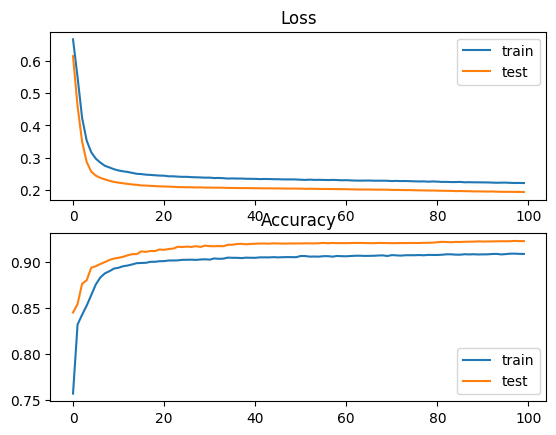

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(train_model.history['loss'], label='train')
pyplot.plot(train_model.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(train_model.history['accuracy'], label='train')
pyplot.plot(train_model.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# predict probabilities for test set
yh_probs = model.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yh_probs = yh_probs[:, 0]

In [ ]:
# Set threshold for decision boundary
threshold = 0.5

# Convert predicted probabilities to class labels using the threshold
yh_predictions = (yh_probs > threshold).astype(int)

# Print the predicted class labels for the first ten test samples
print(yh_predictions[:10])

[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [ ]:
# Model evaluation metrics for LSTM

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yh_predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yh_predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yh_predictions)
print('Recall: %f' % recall)

Accuracy: 0.922656
Precision: 0.957857
Recall: 0.884084


In [ ]:
mt = confusion_matrix(y_true=val_LSTM_y, y_pred=yh_predictions)

In [ ]:
def confusion_matrix_graph(mt, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints the confusion matrix graph.
    """
    plt.imshow(mt, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        mt = mt.astype('float') / mt.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(mt)

    thresh = mt.max() / 2.
    for i, j in itertools.product(range(mt.shape[0]), range(mt.shape[1])):
        plt.text(j, i, mt[i, j],
            horizontalalignment="center",
            color="white" if mt[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Prediction')
labels = ['Normal','Fraud']

Confusion matrix, without normalization
[[54699  2210]
 [ 6586 50231]]


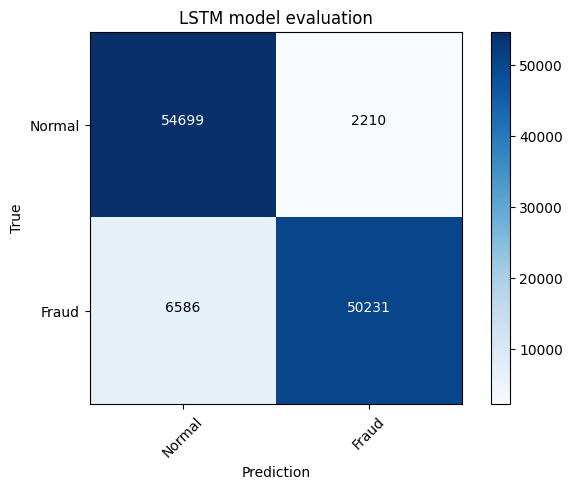

In [ ]:
confusion_matrix_graph(mt=mt, classes=labels, title='LSTM model evaluation')

In [ ]:
# Build attention mechanism layer
class attention_mechanism(Layer):
    def __init__(self,**kwargs):
        super(attention_mechanism,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention_mechanism, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention_mechanism,self).get_config()

In [ ]:
# build LSTM model with attention mechanism layer
model1 = Sequential()
model1.add(LSTM(32,dropout=0.3,recurrent_dropout=0.2,return_sequences=True,input_shape=(1, 4)))  # returns a sequence of vectors of dimension 32
model1.add(LSTM(32,dropout=0.3,recurrent_dropout=0.2,return_sequences=True))  # returns a sequence of vectors of dimension 32
model1.add(attention_mechanism())
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_model1=model1.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=10000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
46/46 [==============================] - 17s 209ms/step - loss: 0.6517 - accuracy: 0.8208 - val_loss: 0.5927 - val_accuracy: 0.8304
Epoch 2/100
46/46 [==============================] - 6s 124ms/step - loss: 0.5309 - accuracy: 0.8269 - val_loss: 0.4477 - val_accuracy: 0.8445
Epoch 3/100
46/46 [==============================] - 7s 162ms/step - loss: 0.4139 - accuracy: 0.8421 - val_loss: 0.3398 - val_accuracy: 0.8742
Epoch 4/100
46/46 [==============================] - 5s 119ms/step - loss: 0.3437 - accuracy: 0.8538 - val_loss: 0.2755 - val_accuracy: 0.8888
Epoch 5/100
46/46 [==============================] - 6s 133ms/step - loss: 0.3118 - accuracy: 0.8658 - val_loss: 0.2507 - val_accuracy: 0.8953
Epoch 6/100
46/46 [==============================] - 7s 144ms/step - loss: 0.2952 - accuracy: 0.8763 - val_loss: 0.2400 - val_accuracy: 0.8964
Epoch 7/100
46/46 [==============================] - 5s 119ms/step - loss: 0.2844 - accuracy: 0.8824 - val_loss: 0.2343 - val_accuracy: 0.898

In [ ]:
# save Attention model and architecture to single file
model1.save('Save_Model_Attention.h5')
print("Saved model to disk")
# summarize model.
model1.summary()

Saved model to disk
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 32)             4736      
                                                                 
 lstm_3 (LSTM)               (None, 1, 32)             8320      
                                                                 
 attention_mechanism (attent  (None, 32)               33        
 ion_mechanism)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,122
Trainable params: 13,122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# LSTM model with attention mechanism layer evaluation
_, acc_train1 = model1.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, acc_test1 = model1.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (acc_train1, acc_test1))

Train: 0.922, Test: 0.923


In [ ]:
# predict probabilities for test set
yt_probs1 = model1.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yt_probs1 = yt_probs1[:, 0]

In [ ]:
# Set threshold for decision boundary
threshold = 0.5

# Convert predicted probabilities to class labels using the threshold
yt_predictions1 = (yt_probs1 > threshold).astype(int)

# Print the predicted class labels for the first ten test samples
print(yt_predictions1[:10])

[1 1 1 0 0 0 0 0 0 1]


In [ ]:
# Model evaluation metrics for LSTM with attention mechanism layer


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yt_predictions1)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yt_predictions1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yt_predictions1)
print('Recall: %f' % recall)

Accuracy: 0.922639
Precision: 0.955960
Recall: 0.885967


In [ ]:
mt1 = confusion_matrix(y_true=val_LSTM_y, y_pred=yt_predictions1)

Confusion matrix, without normalization
[[54590  2319]
 [ 6479 50338]]


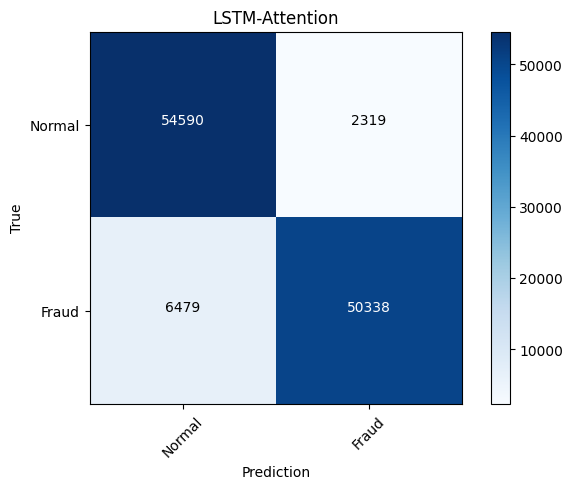

In [ ]:
confusion_matrix_graph(mt=mt1, classes=labels, title='LSTM-Attention', normalize=False)